# Chapter 13: Potential Games - The Physics of Game Theory

A major fear in Game Theory is **Chaos**. If players keep changing their minds to get a better deal, will they cycle forever?

## The Problem of Existence
In many games (like Rock-Paper-Scissors), there is **no stable state** (Pure Nash Equilibrium).
However, **Congestion Games** (like Traffic Routing) are special.

## Rosenthal's Theorem (1973)
Rosenthal proved that in any congestion game, a Pure Nash Equilibrium **always exists**.
He did this by discovering a "Magic Number" called the **Potential Function** ($\Phi$).

### The Physics Analogy
Think of a ball rolling on a hilly terrain.
* Gravity pulls it down (Minimizing Potential Energy).
* Eventually, the ball *must* stop at the bottom of a valley.

Rosenthal showed that **Selfish Drivers** are like that ball.
Every time a driver switches roads to save time (a "Better Response"), they mathematically **lower the Potential Function** of the system.
Since the potential cannot drop below zero, the system **must stop** eventually. When it stops, we are at a Nash Equilibrium.

### The "Magic" Potential Function
The potential is *not* the Total Travel Time (Social Cost). It is slightly different:
$$\Phi = \sum_{e \in \text{Roads}} \sum_{i=1}^{k} c_e(i)$$
Where $c_e(i)$ is the cost of the road when $i$ people are on it.

Let's simulate this "Gravity" by running **Best-Response Dynamics**.

--- Starting Best-Response Dynamics ---
Converged in 72 steps.
Final Potential: 1788
Final Counts: {'A': 19, 'B': 23, 'C': 8}
Final Costs: A=57, B=56, C=58


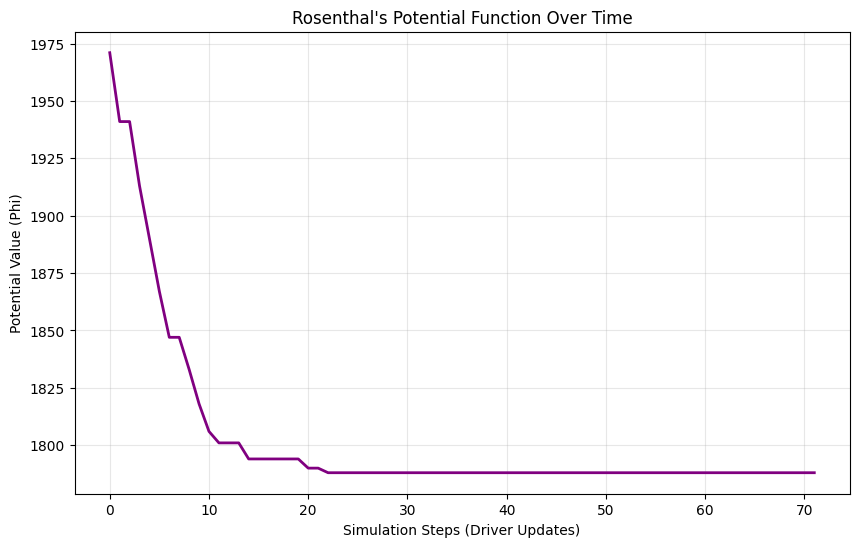

In [1]:
import random
import matplotlib.pyplot as plt

def solve_potential_game():
    """
    Simulates Best-Response Dynamics in a Congestion Game.
    Demonstrates that the 'Potential Function' always decreases, ensuring convergence.
    """
    
    # --- SETUP ---
    # 50 Drivers, 3 Roads
    NUM_DRIVERS = 50
    ROADS = ['A', 'B', 'C']
    
    # Cost Functions (Congestion)
    # Road A: Very steep (gets slow fast) -> Cost = 3 * count
    # Road B: Medium -> Cost = 2 * count + 10
    # Road C: Flat but long -> Cost = 1 * count + 50
    def get_cost(road, num_cars):
        if road == 'A': return 3 * num_cars
        if road == 'B': return 2 * num_cars + 10
        if road == 'C': return 1 * num_cars + 50
        return 9999

    # Rosenthal's Potential Function
    # Phi = Sum over roads of (Sum_{i=1 to k} Cost(i))
    def calculate_potential(current_allocation):
        phi = 0
        counts = {r: 0 for r in ROADS}
        for d in current_allocation:
            counts[d] += 1
            
        for r in ROADS:
            k = counts[r]
            # Sum of costs for the 1st car, 2nd car, ... kth car
            for i in range(1, k + 1):
                phi += get_cost(r, i)
        return phi

    # Initial State: Random allocation
    allocation = [random.choice(ROADS) for _ in range(NUM_DRIVERS)]
    
    potential_history = []
    
    print(f"--- Starting Best-Response Dynamics ---")
    
    # --- ITERATION LOOP ---
    # In each step, pick a random driver and see if they want to move.
    converged = False
    step = 0
    max_steps = 1000
    
    while not converged and step < max_steps:
        step += 1
        current_potential = calculate_potential(allocation)
        potential_history.append(current_potential)
        
        # Pick a random driver
        driver_idx = random.randint(0, NUM_DRIVERS - 1)
        current_road = allocation[driver_idx]
        
        # Calculate current counts
        counts = {'A': 0, 'B': 0, 'C': 0}
        for r in allocation: counts[r] += 1
        
        # Cost I am paying now
        my_current_cost = get_cost(current_road, counts[current_road])
        
        # Check other roads
        best_road = current_road
        best_cost = my_current_cost
        
        for alt_road in ROADS:
            if alt_road == current_road: continue
            
            # If I switch, count on alt_road increases by 1
            new_cost = get_cost(alt_road, counts[alt_road] + 1)
            
            if new_cost < best_cost:
                best_road = alt_road
                best_cost = new_cost
        
        # MOVE!
        if best_road != current_road:
            allocation[driver_idx] = best_road
            # Note: We don't print every move to keep output clean
        else:
            # If this driver is happy, check if EVERYONE is happy
            # (In a real full simulation, we'd need to check all drivers to confirm Nash)
            pass
            
        # Check for Convergence (No moves for many steps)
        # Simplified: If potential hasn't changed in 50 steps, we assume convergence
        if step > 50 and potential_history[-1] == potential_history[-50]:
            converged = True

    # --- RESULTS ---
    print(f"Converged in {step} steps.")
    print(f"Final Potential: {potential_history[-1]}")
    
    # Count final allocation
    final_counts = {'A': 0, 'B': 0, 'C': 0}
    for r in allocation: final_counts[r] += 1
    print(f"Final Counts: {final_counts}")
    print(f"Final Costs: A={get_cost('A', final_counts['A'])}, B={get_cost('B', final_counts['B'])}, C={get_cost('C', final_counts['C'])}")

    # --- VISUALIZATION ---
    plt.figure(figsize=(10, 6))
    plt.plot(potential_history, linewidth=2, color='purple')
    plt.title("Rosenthal's Potential Function Over Time")
    plt.xlabel("Simulation Steps (Driver Updates)")
    plt.ylabel("Potential Value (Phi)")
    plt.grid(True, alpha=0.3)
    plt.show()

solve_potential_game()


### Analysis: The Descent to Equilibrium

Look at the graph produced by the code.
1.  **Strictly Decreasing:** Notice that the curve *never* goes up.
2.  **Convergence:** It eventually flattens out. This flat line is the **Pure Nash Equilibrium**.

**Why does this matter?**
This proves that complex distributed systems (like the Internet routing protocols BGP or TCP) can be stable even without a central dictator. As long as the game has the structure of a "Potential Game," we don't need to worry about infinite loops or chaos. The "Physics" of the game guarantees stability.